# Prepare hand labeling images

To benchmark different droplet detection algorithm, we need some "ground truth" data for objective evaluation. To generate the "ground truth", we will perform hand labeling of droplet locations and sizes on selected images. Each image contains thousands of droplets, so hand labeling everything is too much work. Fortunately, we have some algorithms that can detect the majority of the droplets, so only a small fraction of droplets requires hand labeling, and these droplets are typically the difficult ones for our current algorithm. With the hand labeled data, we can benchmark the algorithms we have, and hopefully improve our droplet detection performance. 

The hand labeling data are organized in the following structure:

```
IMG01\
    img.tif (raw image, gray scale)
    prelim_detection.csv (result from current algorithm, [X, Y, R])
    info.txt (image information, allowing us to trace back to the original experiment trial)

    hand.csv (hand labeling data)
    hand.png (a snapshot of the hand labeling result)
```

In the old data, we have 16 days of experiment in total. We can extract 2 images, one with small droplets and one with large droplets, from each day. In total, 32 images will be prepared for the hand labeling. 

I'm taking more videos of condensation recently, so new data is evolving. 

In this notebook, the database for hand labeling described above is prepared.

In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
video_path = r"G:\My Drive\Research projects\F\Data\06192024\exp7.avi"
cap = cv2.VideoCapture(video_path)

In [29]:
nframe = cap.get(cv2.CAP_PROP_FRAME_COUNT)
nframe

4995.0

In [30]:
# get 2 frames, one at 1/2, the other at 2/3
targets = [int(nframe/2), int(nframe*2/3)]

ret = True
i = 0
while ret == True:
    ret, frame = cap.read()
    if i == targets[0]: img1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if i == targets[1]: img2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    i += 1

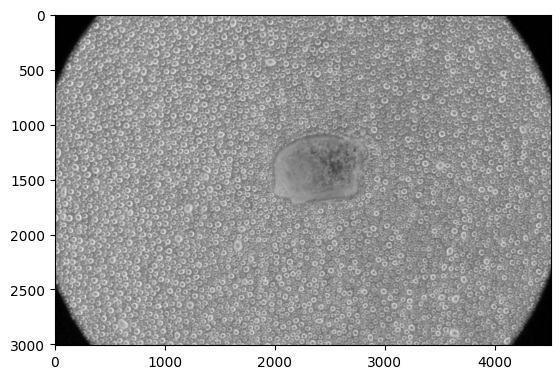

In [31]:
plt.imshow(img2, cmap="gray")

In [51]:
circles = cv2.HoughCircles(
    img2, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    
    minDist=50, 
    param1=12, 
    param2=20, 
    minRadius=10, 
    maxRadius=30
)

In [52]:
circles.shape

(1, 2886, 3)

In [53]:
#prepare results
output_frame = img2.copy()
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    centers = circles[:, :2]
    radii = circles[:, 2]
    for (x, y, r) in circles:
        cv2.circle(output_frame, (x, y), r, (0, 255, 0), 2)

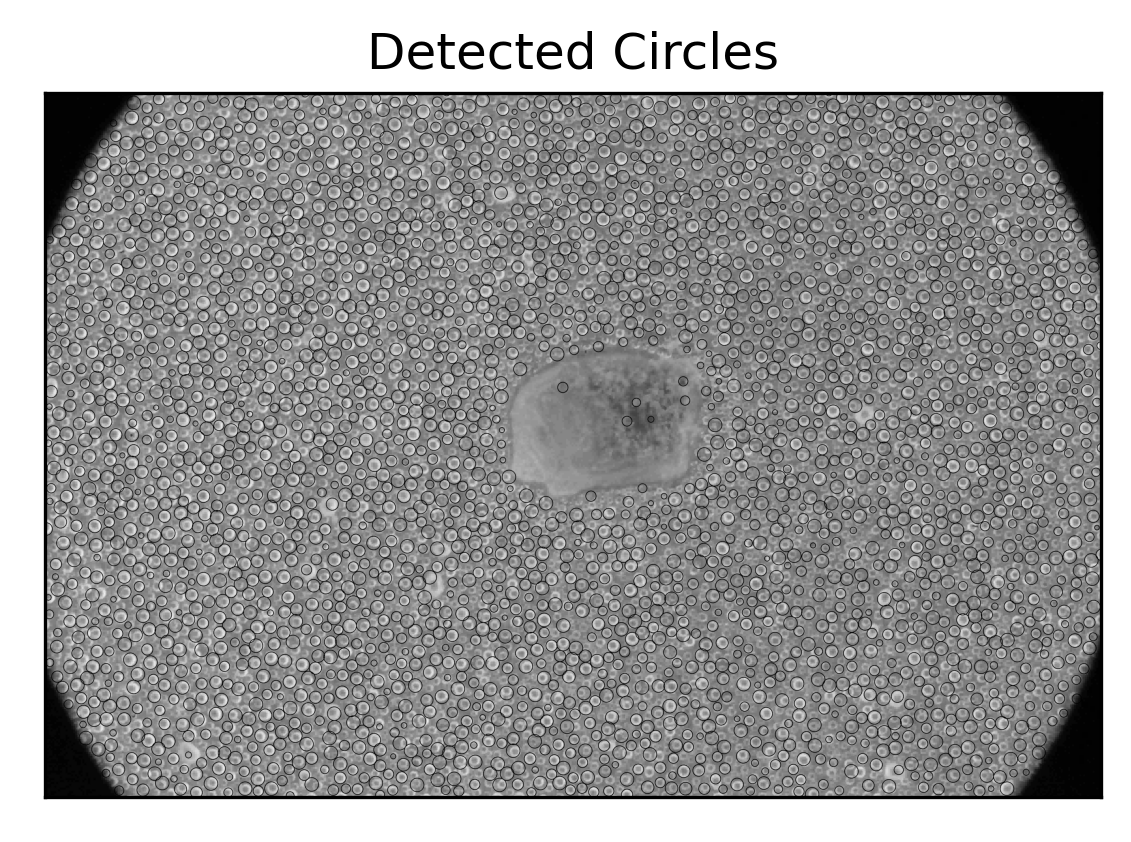

In [54]:
#display results
plt.figure(figsize=(10, 10), dpi=300)
plt.subplot(122), plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
plt.title('Detected Circles'), plt.xticks([]), plt.yticks([])
plt.show()

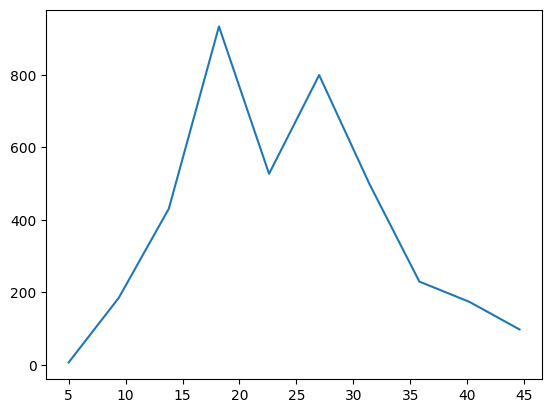

In [12]:
hist, bin_edges = np.histogram(radii)
plt.plot(bin_edges[:-1], hist)